# Jupyter notebooks and Pebbles

What's under the hood?

Select the cell below and press ctrl+Enter

In [ ]:
!uname -a

[Pebbles](https://github.com/cscfi/pebbles/) is a system that runs Jupyter Notebooks and RStudio Server instances in containers in the cloud. Containers are Linux flavours.

If you prepend a line in a code shell with !, Jupyter will run the rest of that line as a command line command in the underlying container and display the standard output of the command to you. This is essential in modifying the base image from inside a notebook.

The other type of cells are Markdown cells, which contain text in [Markdown](https://daringfireball.net/projects/markdown/syntax) format.

You can either select this cell and press enter to view the source or double click it. Like with a code cell, ctrl+Enter "runs" the code or you can press the play button in the menu.

In [ ]:
!cat /etc/issue

The details of the containers often vary between image providers, but Debian/Ubuntu variants are popular. If you want to make modifications you have the permission to do most things a user has the permission to do.

## Basic use

A typical Jupyter notebook consists of alternating code and markdown cells that tell a narrative.

This is how we do a Hello World in Python.

In [ ]:
print("Hello World!")

If the code in a code cell prints something to stdout, that is printed after the code cell.

If the last thing in a cell is a variable, the value of that variable is given separately and labeled as the output of that value.

In [ ]:
print("Hello world")
var = "I am a variable!"
var

Go ahead and see what removing the third line does to the output.

## Jupyter magics

Jupyter magics are commands prepended with one or two %-sign that can be used across all kernels.

* *line magics* have one % character and take the rest of the text on that line as parameters
* *cell magics* have two %% characters and must be on the first line of the cell

If you put a question mark at the end you can get help.

In [ ]:
%ls
# go ahead and try what %ls? does

You can capture the the output shell commands, that are prepended with a !.

In [ ]:
ls_output = !ls
print(ls_output)

With magics you need to use the magic %sx.

In [ ]:
ls_output = %sx ls
print(ls_output)

You can get a list of all the available magics with

In [ ]:
%lsmagic

The list is generated on the fly, because you can actually write your own magics to extend the functionality of Jupyter.

For help, remember the ? syntax.

The following may be of particular use.

In [ ]:
%timeit?
# this is and it's cell magic brother %%timeit come in handy when
# clarifying code performance

In [1]:
%load?
# When you have a complex example and you're afraid students will mes it up
# you can store it as a file and load the code from that file to a cell, so 
# it can be re-loaded after 

## Kernels

Jupyter notebooks uses `kernels` to implement interfaces in different languages.

For some kernels you also need to ensure that the prerequisites are installed, e.g. a `gcc` for the C kernel and a Common Lisp interpreter for the cl-jupyter kernel. You can use Jupyter magics to run the prerequisite commands to install them.

For others, like the `bash` kernel bash is already installed and we can just install it using `pip`.

In [ ]:
!pip install bash_kernel
!python -m bash_kernel.install

Now you need to refresh this page in your browser for the kernel to be visible and selectable under 

`Kernel -> Change Kernel`

Likewise in the file selector view you need to refresh the page.

## IPython widgets and plotting

Python and R support plotting quite well. Typically one needs to tell the plotting library to plot to a notebook and not to a file or new X window.

In [ ]:
%matplotlib inline 
#notice the cell magic that configures matplotlib to plot inside 
#the notebook
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x,y, 'r-')
plt.show()

IPython has a concept called [widgets](https://github.com/jupyter-widgets/ipywidgets), which can be used to create interactive experiences that don't require programming.

At it's simplest an `interact` decorater reads the parameters of the method it decorates and creates HTML widgets for editing the values re-runs the function every time one of the values is changed.


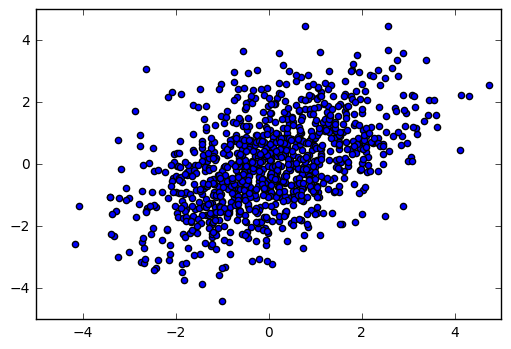

In [29]:
from ipywidgets import interact # IPython.html.widgets before IPython 4.0

@interact
def plot(mean_x=(-3.0,3.0, 0.5),  #start, stop and step
         mean_y=(-3,3), # start and stop, but as integers
         std_x=(0.0,3,0.1), 
         std_y=(0.0, 3, 0.1), 
         correlation=(0.0, 1.0, 0.05)):
    means = [mean_x, mean_y]
    cov = [[std_x**2, std_x*std_y*correlation], [std_x*std_y*correlation, std_y**2]]
    multi = np.random.multivariate_normal(means, cov, 1000).T
    plt.scatter(multi[0],multi[1])
    plt.axis([-5, 5, -5, 5]) # fix axes to make changes more apparent
    plt.show()
    

### More material 

For a quick start guide for running the notebook on your own machine see [here](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/).

For a more in-depth guide into all the bells and whistles in Jupyter you can check out the relevant [CodeRefinery lesson](https://github.com/coderefinery/jupyter)